## Make Dataset Classification using qda with Dimension Reduction

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [11]:
comparison_test = []
comparison_time = []

### LDA Feature 2 Visualization & QDA Classification

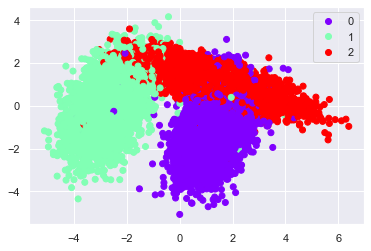

(15000, 2)


In [12]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
target_names = ["0", "1", "2"]

lda = LinearDiscriminantAnalysis(n_components=2)
features = lda.fit_transform(features, target)

x = features[:, 0]
y = features[:, 1]

plt.figure()
img = plt.scatter(x, y, c=target, cmap=plt.cm.rainbow)
plt.legend(img.legend_elements()[0], target_names)
plt.show()

print(features.shape)

In [13]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.930833
Training Time : 0.0004 sec


### LDA Feature 1 Visualization & QDA Classification

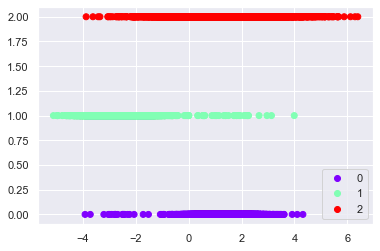

(15000, 1)


In [14]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
target_names = ["0", "1", "2"]

lda = LinearDiscriminantAnalysis(n_components=1)
features = lda.fit_transform(features, target)

x = features[:, 0]
y = target

plt.figure()
img = plt.scatter(x, y, c=target, cmap=plt.cm.rainbow)
plt.legend(img.legend_elements()[0], target_names)
plt.show()

print(features.shape)

In [15]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.758633
Training Time : 0.0003 sec


## LDA Feature 4 (Original Dataset)

In [16]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

print(features.shape)

(15000, 4)


In [17]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  12000  / test size :  3000
----------------------------------------
Test set score: 0.961167
Training Time : 0.0004 sec


### Method Comparison

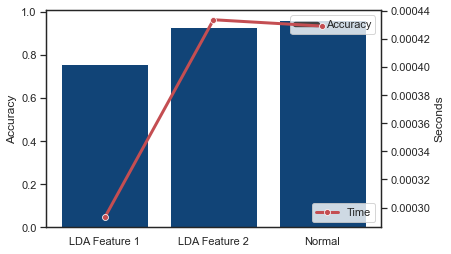

In [18]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=["LDA Feature 1", "LDA Feature 2", "Normal"],
            y=[comparison_test[1], comparison_test[0], comparison_test[2]], 
            color='#004488',
            ax=ax1)

sns.lineplot(x=["LDA Feature 1", "LDA Feature 2", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_time[2]],
             color='r',
             marker="o",
             ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

ax1.legend(["Accuracy"], loc=1)
ax2.legend(["Time"], loc=4)

plt.show()
sns.set()